# Introduction to Deep Learning and Neural Network in Simulation and Modeling 
## Presented by
### Joyanta J. Mondal
#### Department of Computer Science
#### BRAC University
#### Email: joyanta.csebracu@gmail.com

##### For any improvement or suggestion the email, please do not hesitate to email me with your proposed suggestion.

#### Slide Link: https://docs.google.com/presentation/d/12t9wUJTEA2Zi5LKcsSrE7jCglWy-klhAWwshCBH-3AQ/edit?usp=sharing

#### Updated Version of This File (if any): https://colab.research.google.com/drive/1svfu4vyx7z3NKCHsv1V0K4mBb4EDYke-?usp=sharing

Let us start from learning how to construct Artificial Neural Network (ANN).

I will be using Tensorflow to construct this. 

I will be using PIMA Indians Diabetes Dataset to detect if a person has diabetes or not with related data using ANN.

Resources: 

https://www.javatpoint.com/artificial-neural-network

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ (I am primarily using this resource in this colab)

## 1. Importing Necessary Libraries, Preparing Data

Let us start with importing necessary libraries and methods.

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Now let's upload the dataset.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes-structured.csv to pima-indians-diabetes-structured (2).csv


Now let's load the dataset.

Always remember to learn the data of the dataset.

In [ ]:
# dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset = pd.read_csv('pima-indians-diabetes-structured.csv')
dataset.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are eight input variables and one output variable (the last column). We will be learning a model to map rows of input variables (X) to an output variable (y), which we often summarize as y = f(X).

The variables can be summarized as follows:

**Input Variables (X):**

*   Number of times pregnant
*   Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   Diastolic blood pressure (mm Hg)
*   Triceps skin fold thickness (mm)
*   2-Hour serum insulin (mu U/ml)
*   Body mass index (weight in kg/(height in m)^2)
*   Diabetes pedigree function
*   Age (years)

**Output Variables (y):**

*   Class variable (0 or 1) [Or Have Diabetes or Do not Have Diabetes]

More Details: [Click Here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.names)





## 2. Explanatory Data Analysis (EDA)

Correlation with one column with another (Ranges from -1 to 1) [Least correlated to most correlated]

Example - Finding connection level between age and number of times pregnant

In [ ]:
features = list(dataset.columns)
correlation = dataset[features].corr(method='spearman')

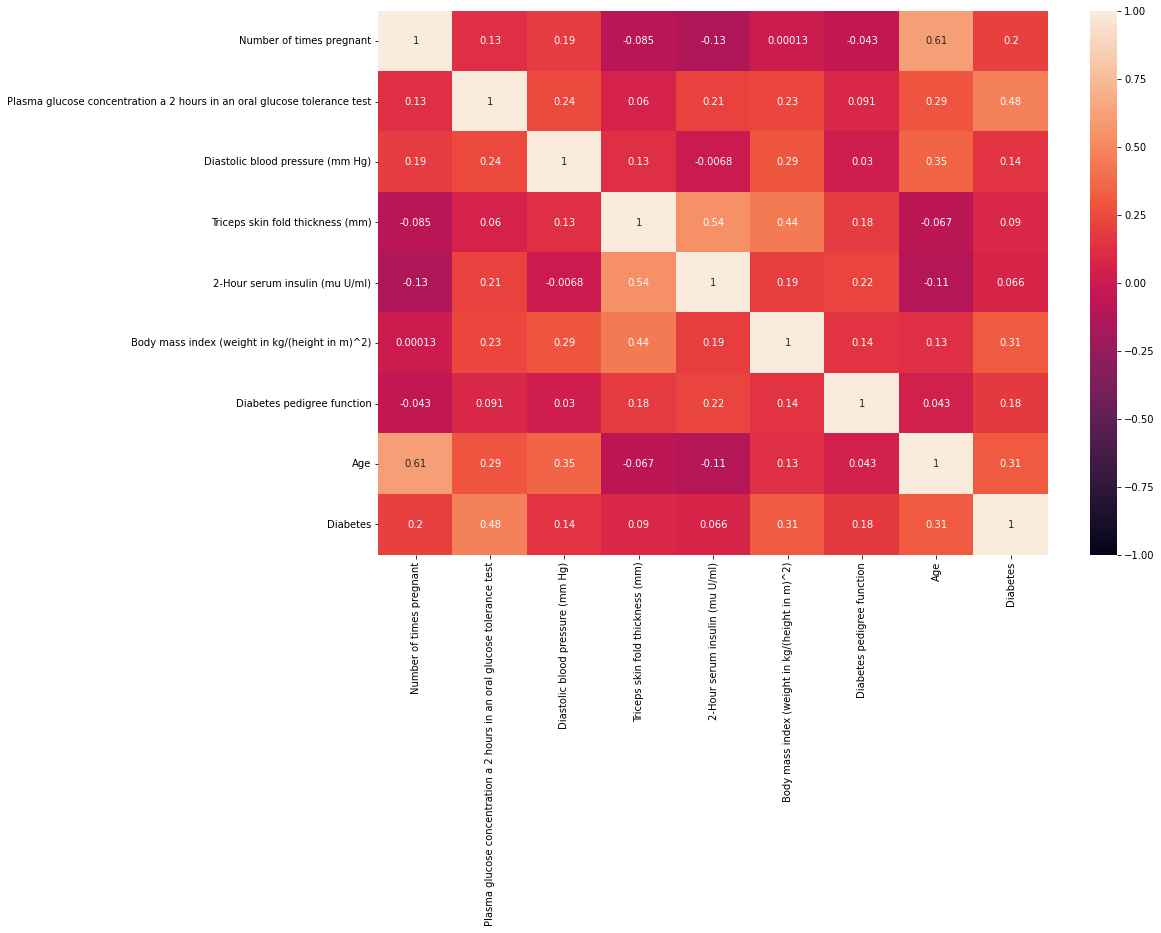

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1)
plt.show()

Pairplot:

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


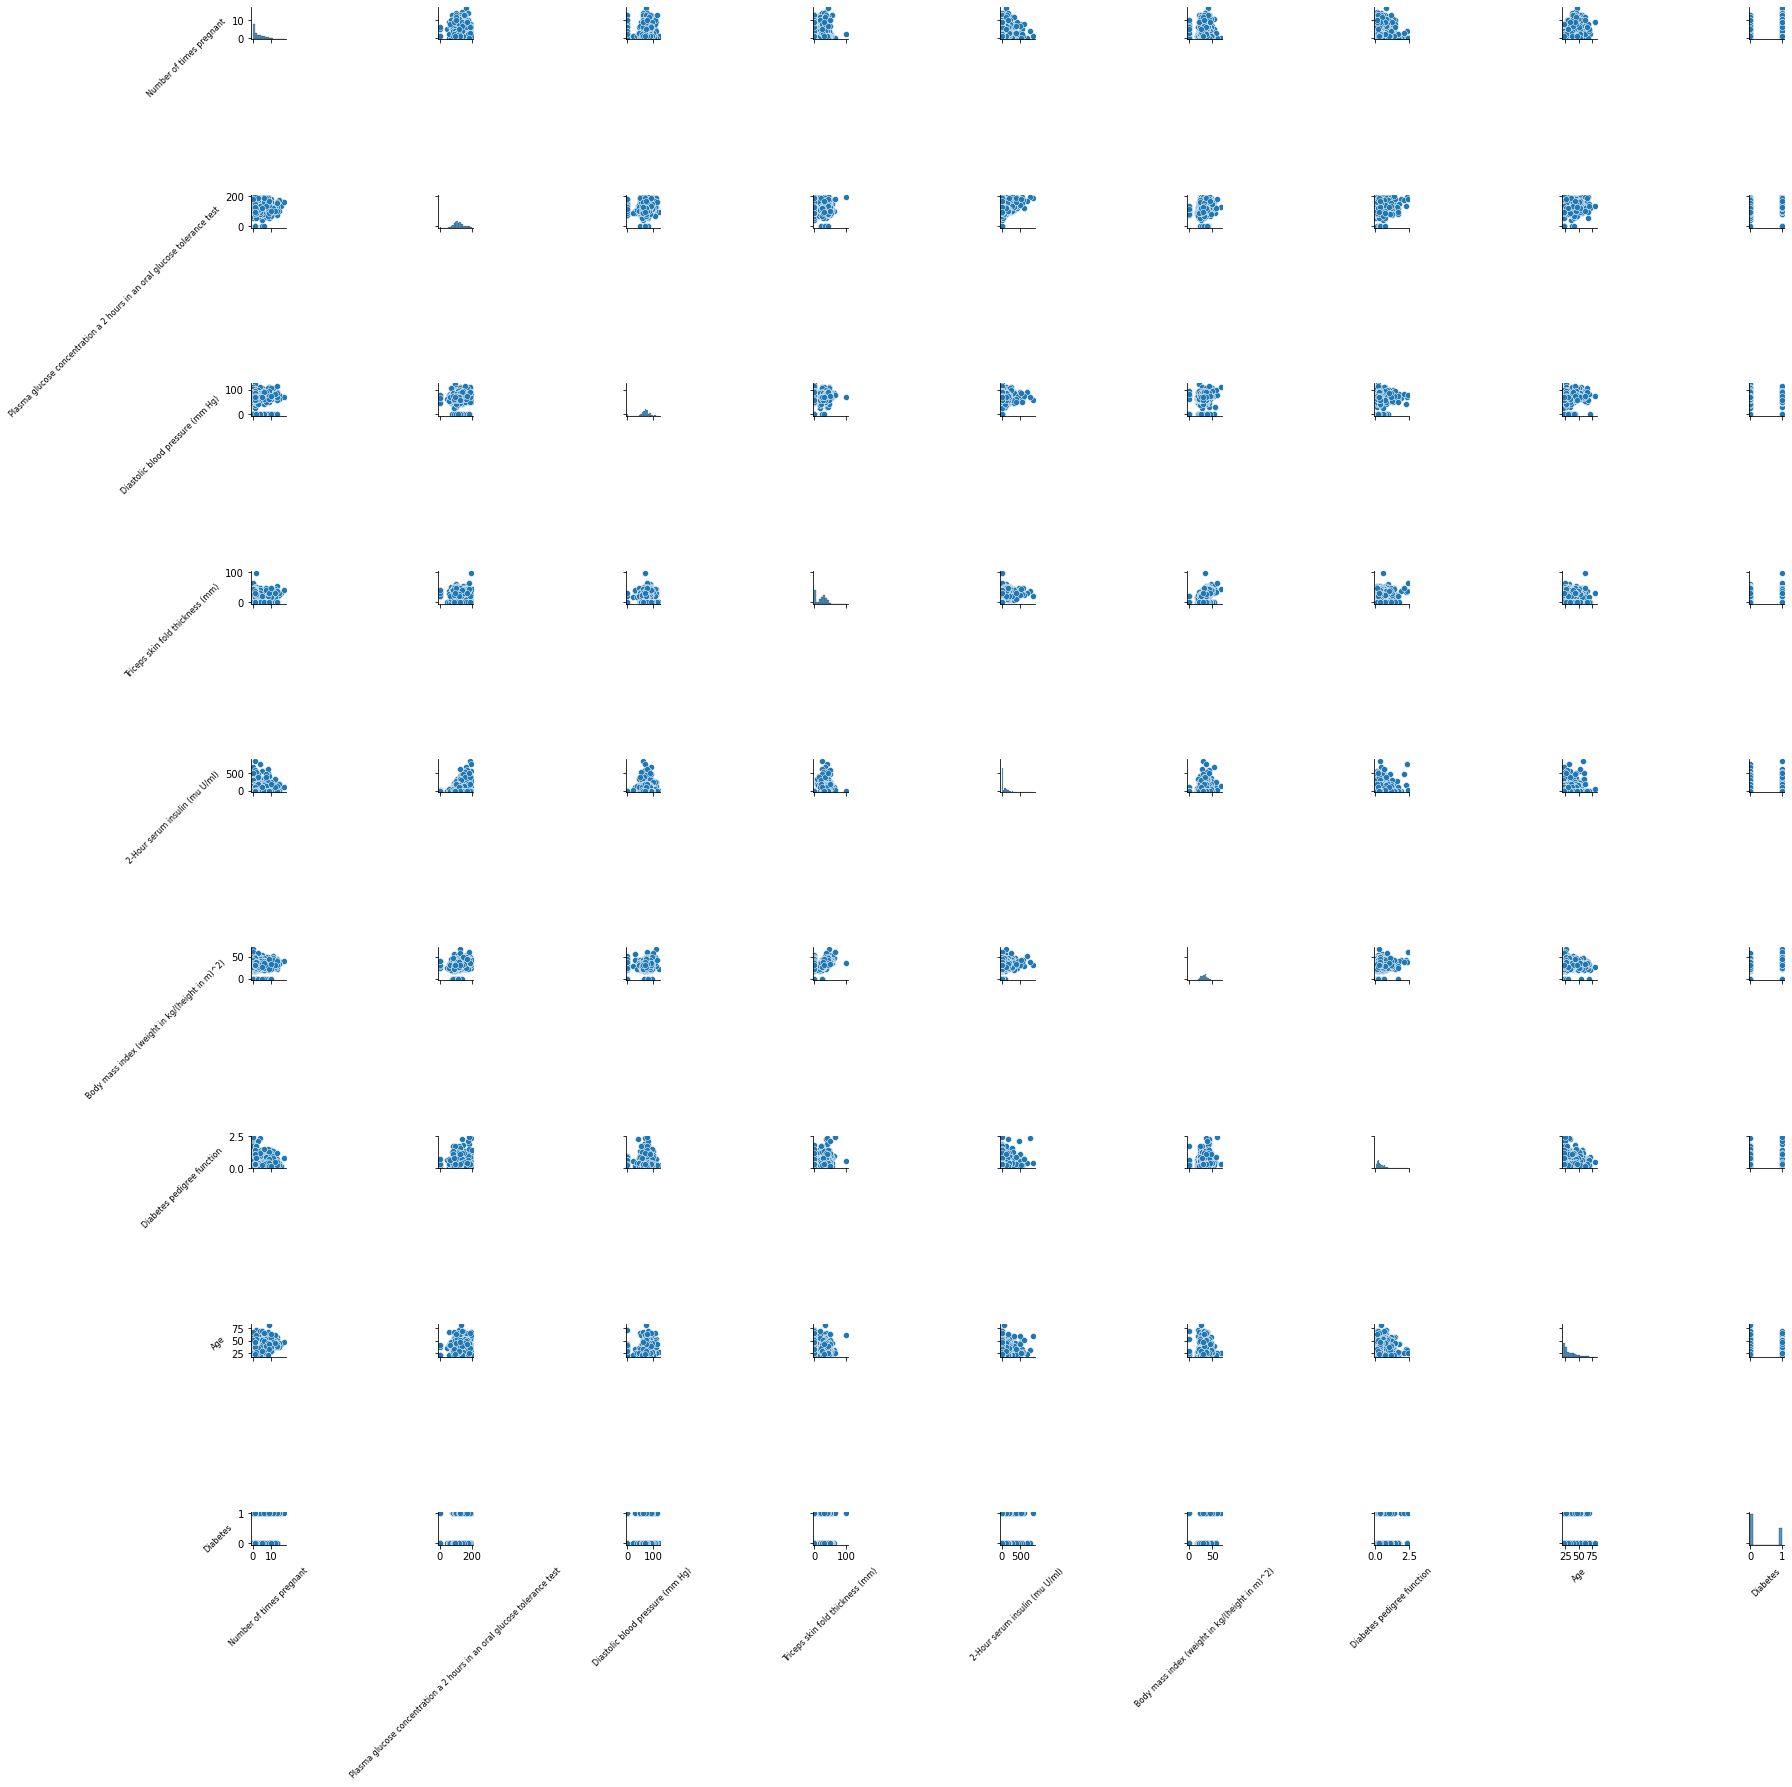

In [ ]:
g = sns.pairplot(dataset)
# g.set_xticklabels(g.get_xticklabels(), rotation=40, ha="right", fontsize=7)
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45, fontsize=8)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45, fontsize=8)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')


In [ ]:
# split into input/feature (X) and output/label (y) variables

x = dataset.drop(columns=['Diabetes'], axis=1)
y = dataset['Diabetes']

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## 3. Preparing ANN Model

Models in Keras are defined as a sequence of layers.

**We create a Sequential model and add layers one at a time until we are happy with our network architecture.**

*The first thing to get right is to ensure the input layer has the right number of input features.* This can be specified when creating the first layer with the `input_dim` argument and setting it to 8 (for the 8 input variables).

    How do we know what number of layers and their types are best for us?

This is a very hard question. There are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation. Generally, you need a network large enough to capture the structure of the problem. Even sometimes, you get a better result from small network based models.

    In this example, we will use a fully-connected network structure with three layers.

*Fully connected layers are defined using the Dense class.* 
Fully Connected layers in a neural networks are those layers where all the nodes from one layer are connected to the units of the next layer.

We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

*We will use the rectified linear unit activation function referred to as ReLU on the first two layers and the Sigmoid function in the output layer.*



It used to be the case that Sigmoid and Tanh activation functions were preferred for all layers. *These days, better performance is achieved using the ReLU activation function.* We use a sigmoid on the output layer to ensure our network output is between 0 and 1 and easy to map to either a probability of class 1 or snap to a hard classification of either class with a default threshold of 0.5.

[When to use specific activation function in layers?](https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/)

We can piece it all together by adding each layer:


*   The model expects rows of data with 8 variables (the `input_dim=8` argument)
*   The first hidden layer has 12 nodes and uses the relu activation function.
*   The second hidden layer has 8 nodes and uses the relu activation function.
*   The output layer has one node and uses the sigmoid activation function.







In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 4. Compile The Model

Now that the model is defined, we can compile it.

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as TensorFlow or PyTorch. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed system.

    When compiling, we must specify some additional properties required when training the network. 

Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.

    We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is used for a binary classification problems and is defined in Keras as `binary_crossentropy`. You can learn more about choosing loss functions based on your problem here:

[How to Choose Loss Functions When Training Deep Learning Neural Networks](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)

We will define the optimizer as the efficient stochastic gradient descent algorithm `adam`. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

[Which Optimizer to Use?](https://towardsdatascience.com/7-tips-to-choose-the-best-optimizer-47bb9c1219e)

Finally, being a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## 5. Fit The Model

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the `fit()` function on the model.

Training occurs over epochs and each epoch is split into batches.



*   Epoch: One pass through all of the rows in the training dataset.
*   Batch: One or more samples considered by the model within an epoch before weights are updated.


One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 


*The training process will run for a fixed number of iterations through the dataset called epochs*, that we must specify using the `epochs` argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the `batch_size` argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.

These configurations can be chosen experimentally by trial and error. We want to train the model enough so that it learns a good (or good enough) mapping of rows of input data to the output classification. The model will always have some error, but the amount of error will level out after some point for a given model configuration. 

In [ ]:
# fit the keras model on the dataset
model.fit(x, y, epochs=150, batch_size=10) #This is where the work happens on your CPU or GPU.

Epoch 1/150
77/77 [==============================] - 2s 2ms/step - loss: 1.6395 - accuracy: 0.5964
Epoch 2/150
77/77 [==============================] - 0s 3ms/step - loss: 0.8761 - accuracy: 0.6302
Epoch 3/150
77/77 [==============================] - 0s 3ms/step - loss: 0.7055 - accuracy: 0.6510
Epoch 4/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.6836
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6011 - accuracy: 0.6914
Epoch 6/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5997 - accuracy: 0.6901
Epoch 7/150
77/77 [==============================] - 0s 3ms/step - loss: 0.6040 - accuracy: 0.6875
Epoch 8/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.6914
Epoch 9/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5853 - accuracy: 0.6940
Epoch 10/150
77/77 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.6966
Epoch 11/

## 6. Evaluate The Model

We have trained our neural network on the entire dataset and we can evaluate the performance of the network on the same dataset.

This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), ***but no idea of how well the algorithm might perform on new data.*** 

We have done this for simplicity, but ideally, you can (and should) separate your data into train and test datasets for training and evaluation of your model.

You can evaluate your model on your training dataset using the *evaluate()* function on your model and pass it the same input and output used to train the model.

This will generate a prediction for each input and output pair and collect scores, including the average loss and any metrics you have configured, such as accuracy.

The *evaluate()* function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset. 

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))
print('Loss: %.2f' % (loss*100))

24/24 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.7786
Accuracy: 77.86
Loss: 48.21


#So here you go!
You have your first modelled ANN now! Congratulations on stepping into the Deep Learning world!

Now your task is to:

1. Explore CNN Codes.
2. Explore RNN Codes.
3. Make your own CNN/RNN Code which solves any problem (preferably real life problems)

Resources:

CNN: 

0. https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/
1. https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial
2. https://www.kaggle.com/code/mauriciofigueiredo/fruit-classification-with-a-simple-cnn
3. https://www.kaggle.com/code/loaiabdalslam/brain-tumor-mri-classification-vgg16
4. https://www.kaggle.com/code/kaushikholla/facemask-detection-using-tensorflow-2
5. https://www.tensorflow.org/tutorials/images/cnn
6. https://www.tensorflow.org/tutorials/images/classification

RNN: 

1. https://github.com/vyomshm/Sentiment-RNN/blob/master/Sentiment%20RNN.ipynb
2. https://www.tensorflow.org/guide/keras/rnn
3. https://machinelearningmastery.com/recurrent-neural-network-algorithms-for-deep-learning/
4. https://machinelearningmastery.com/an-introduction-to-recurrent-neural-networks-and-the-math-that-powers-them/
5. https://github.com/PrithviKamath/Human-Activity-Recognition/blob/master/HumanActivityRecognition.ipynb
6. https://www.youtube.com/watch?v=BSpXCRTOLJA

Overall:

1. https://youtube.com/playlist?list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN
2. https://youtube.com/playlist?list=PLQVvvaa0QuDcjD5BAw2DxE6OF2tius3V3
3. https://youtube.com/playlist?list=PLZsOBAyNTZwYuFfht61R0b-N1TNIX5_Vy